In [1]:
##### Imports #####
import os
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.scale as scl

from Bio import SeqIO
from Bio.SeqIO.QualityIO import FastqGeneralIterator


In [3]:
path_prefix = "../outputs/salad-irg/test-cluster/kat/"
fastq_path="../outputs/salad-irg/test-cluster/unmapped_reads.fastq"
samples = ["mapped", "unmapped"] #"full", 


median_occurence = None

for s in samples :

    tmp = pd.read_csv(path_prefix + s + "-stats.tsv", sep="\t", usecols=[0,1])
    tmp["seq_name"] = tmp["seq_name"].str.rsplit(' ').str.get(0) #remove length information
    tmp = tmp.rename(columns={"median" : s})  #create a unique column to allow merging

    if median_occurence is None :
        median_occurence = tmp
    else :
        median_occurence = pd.merge(median_occurence, tmp, how='outer', on='seq_name')

median_occurence = median_occurence.fillna(0)
median_occurence


,seq_name,mapped,unmapped
0,m64122_211021_080159/100007936/ccs,1.0,0.0
1,m64122_211021_080159/100007938/ccs,0.0,1.0
2,m64122_211021_080159/100007939/ccs,8.0,0.0
3,m64122_211021_080159/100007942/ccs,12.0,0.0
4,m64122_211021_080159/100007944/ccs,0.0,1.0
...,...,...,...
2913011,m64122_211021_080159/99945296/ccs,0.0,1.0
2913012,m64122_211021_080159/99945298/ccs,4.0,0.0
2913013,m64122_211021_080159/99945303/ccs,2.0,0.0
2913014,m64122_211021_080159/99945305/ccs,0.0,3.0


In [4]:
#print("Average occurence (full) :", median_occurence["full"].mean())
print("Average occurence (mapped) :", median_occurence[median_occurence["mapped"] > 0]["mapped"].mean())
print("Average occurence (unmapped) :", median_occurence[median_occurence["unmapped"] > 0]["unmapped"].mean())



Average occurence (mapped) : 3.2148861550830565
Average occurence (unmapped) : 1.2345052147647182


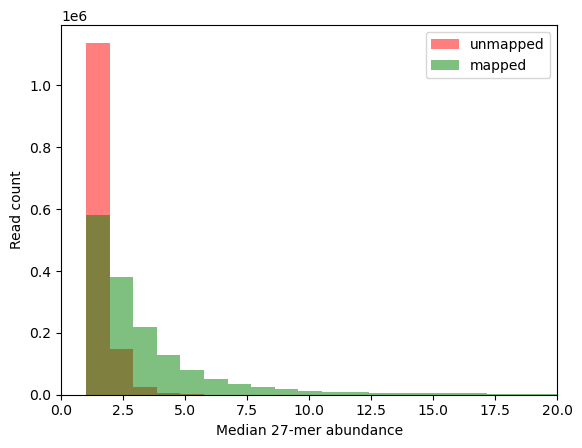

In [6]:
### Compare the distributions
#plt.yscale('log')
xlim = median_occurence["mapped"].max()
xlim = 20
density = False
plt.xlim(right=xlim)
bins=20
#plt.hist(median_occurence["full"], label="full", bins=bins, color='black') 
_, bins, _  = plt.hist(median_occurence["unmapped"], label="unmapped", alpha=0.5, color='red', bins=bins, range=(1, xlim), density=density )
plt.hist(median_occurence["mapped"], label="mapped", alpha=0.5, color='green', bins=bins, range=(1,xlim), density=density )

  
plt.legend(loc='upper right') 
plt.xlabel("Median 27-mer abundance")
plt.ylabel("Read count")
plt.show()



In [7]:


fastq_path="../outputs/salad-irg/metaMDBG/mapped_reads.fastq"

target_reads = list(median_occurence[median_occurence["mapped"] ==1]["seq_name"])
random.shuffle(target_reads)
fastq_file = open(fastq_path, "r")

number_of_sequences = 0
length_of_sequences=0
for title, seq, _ in FastqGeneralIterator(fastq_file) : 
    if title in target_reads : 
        if (len(seq) > 100) :
            print(">"+title)
            print(seq)
            number_of_sequences +=1
            length_of_sequences+=len(seq)
    if(number_of_sequences == 100) : 
        break

if number_of_sequences == 0 :
    print("No sequence found")
else : 
    print(length_of_sequences / number_of_sequences, "(" + str(number_of_sequences) + ")")



>m64122_211021_080159/174524827/ccs
TCGACGACGCGCTCGACTTCCTCCTGCGCATCCGATCGCTGGCGCAGCTCGCGCTCGGGCGCGCCACCGATCAGCTCACCTTCGAGATCCAGGAGGCGATCGCGCCCGGGCTCTACCCGGACGTGCTGATCCCGGCTGGCGATGTGCGCCCTGCGGTCGCGCCCGCGGTCGAGGCGCTCATGCGGCGCTACTACCTCCACGCGCGCGCGGTCGTGCGCGTGGCGGACCGCCTGCTCGAGTCGGCGCGCGTCCCGGAGCGCAAGAAGCCGCGCATCCGCGCGATCGACTCGAGCTTCCTGCTGTGGAACGGCAAGCTGGCGGTGAGCGACCCGGCCGTCTTTCGCGAGCGGCCGTCGGAGATGATCCGCCTCTTCCGCGTCGCGCTCGAGCACGACGTGCCGATCTACCGCCACACCGTCGAGCTCATCGAGGACCAGCTCGCCCTGGGCGGCGCGGCGCTCCTGGCCGATCCGGACGCGGCGGCGCTCTTCCTCGACGCCCTGTGCGACGTACGCGACGCGCGCCAGCCGTCCCTGCTCGAGGAGATGCACCAGGCCGGGGTGCTCAACGCCATGATGCCGGAGTGGGCGCCATGCACCTGCCGCGTGCAGCACGACCTCTACCACGTCTACACGGTCGACCAGCACCAGCTCTACGCGGTGGCCATGCTCAAGCGGACGATGCGCGGCGAGCTCGCCGCCGAGGCGCCGCTCGCCACCCAGGTCGCCGCGCGCATCGGCCCGCGCCGCTCGCTCTTCCTCGGCACGCTCCTCCACGACTCGGGCAAGCCGCTCGGCAAGGGGCATGCCGAGAAGGGCGCGCGCCTGACCGGCATCGTCGCGCGGCGCCTGGGCATGAGCGAGGCGGAGTCGTCGCGCGCCGAGATGCTGGTCCGCCAGCACCTGACCATGTCGCACCTGTCGCAGCGGCGCGATCTCACCGACCCGGAGGTGATCGAGCGCTT

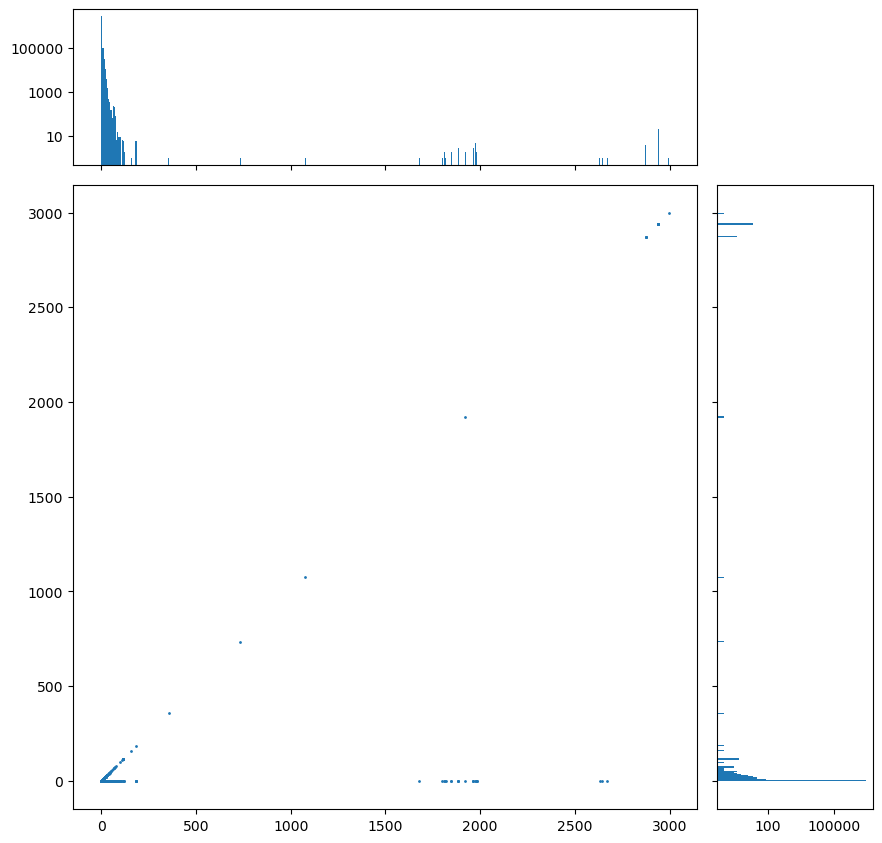

In [8]:
x = median_occurence["full"]
y = median_occurence["unmapped"]

# Create figure
fig = plt.figure(figsize=(10, 10))

gs = fig.add_gridspec(2, 2,  
    width_ratios=(4, 1), height_ratios=(1, 4),
    left=0.1, right=0.9, bottom=0.1, top=0.9,
    wspace=0.05, hspace=0.05)

# Create axes
ax = fig.add_subplot(gs[1, 0])
#ax.set_xlim([0,200])
#ax.set_ylim([0,200])


ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.set_yscale('log')
ax_histx.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax_histx.tick_params(axis="x", labelbottom=False)

ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.set_xscale('log')
ax_histy.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax_histy.tick_params(axis="y", labelleft=False)

# Scatter plot
ax.scatter(x, y, s=1)

# Histograms
bins = 500
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

plt.show()